In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('/content/dataset.csv')
#handle missing values
data = data.dropna()
# Encode target variable
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

X = data.drop(columns=['Target'])
y = data['Target']

# Standardize numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance to show variable that most affects outcome
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


(3539, 34)
(885, 34)
(3539,)
(885,)
Accuracy: 0.7536723163841808
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       316
           1       0.45      0.31      0.37       151
           2       0.77      0.92      0.84       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.74      0.75      0.74       885

Feature Importance:
 Curricular units 2nd sem (approved)               0.558603
Tuition fees up to date                           0.074770
Curricular units 1st sem (approved)               0.048035
Curricular units 2nd sem (grade)                  0.035861
Curricular units 1st sem (enrolled)               0.032508
Curricular units 2nd sem (evaluations)            0.032097
Curricular units 1st sem (evaluations)            0.028830
Course                                            0.026180
Curricular units 2nd sem (enrolled)  

In [ ]:
from sklearn import metrics
import numpy as np
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mae)
print('mean absolute error',mae)
print('mean squared error',mae)
print('Root mean squared error',rmse)

mean absolute error 0.3096045197740113
mean squared error 0.3096045197740113
Root mean squared error 0.5564211712129682


In [ ]:
import joblib
joblib.dump(model, 'student_enrollment_model.pkl')


['student_enrollment_model.pkl']

In [ ]:
model = joblib.load('student_enrollment_model.pkl')

In [ ]:
# test sample data
sample_data = X_test.iloc[:5]
predictions = model.predict(sample_data)

predicted_labels = label_encoder.inverse_transform(predictions)

print("Sample Data Predictions:")
for i, (data_row, label) in enumerate(zip(sample_data.values, predicted_labels)):
    print(f"Sample {i + 1}: Features = {data_row}, Predicted Status = {label}")


Sample Data Predictions:
Sample 1: Features = [ 4.65829423  0.96501847 -0.55406775 -0.43847926  0.35008246 -0.38640411
 -0.14558608 -1.03289399 -1.39948137 -0.32966926 -0.37461171  0.90751193
 -0.10799294 -0.358167    0.36813532 -0.73657203  1.73939004  0.8876885
 -0.15968211 -0.30081306 -0.10910515 -0.31087931 -1.52125739 -2.19710239
 -0.19927303 -0.28244231 -0.105726    2.01056349 -1.13978845 -0.0441835
 -0.19944099 -0.17500679 -0.4542526   0.8891263 ], Predicted Status = Dropout
Sample 2: Features = [-0.29482875  0.21006857 -0.55406775  0.02327562  0.35008246 -0.38640411
 -0.14558608 -0.9220935  -1.2183802  -1.33032573 -1.19831063 -1.10191389
 -0.10799294 -0.358167    0.36813532 -0.73657203 -0.57491418 -0.69397309
 -0.15968211 -0.30081306 -0.10910515  0.16774609  0.09483201  0.19215047
 -0.19927303 -0.28244231 -0.105726   -0.0160332   0.51890369  0.36709617
 -0.19944099  1.73973149 -0.67124225 -0.40621112], Predicted Status = Graduate
Sample 3: Features = [-0.29482875  0.21006857 -0

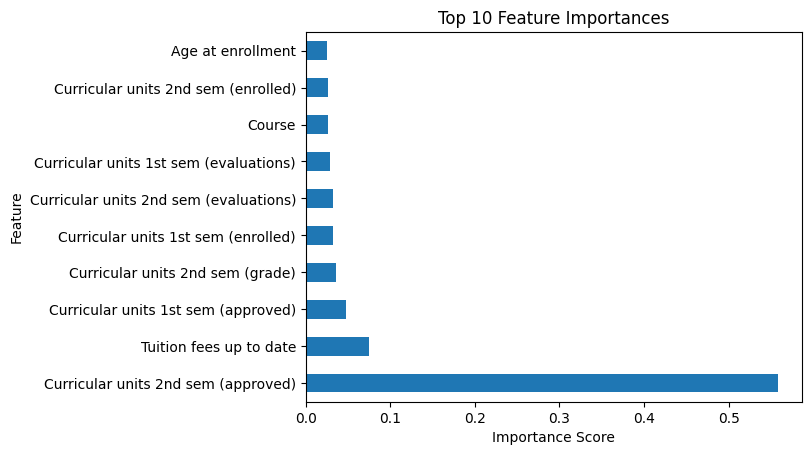

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


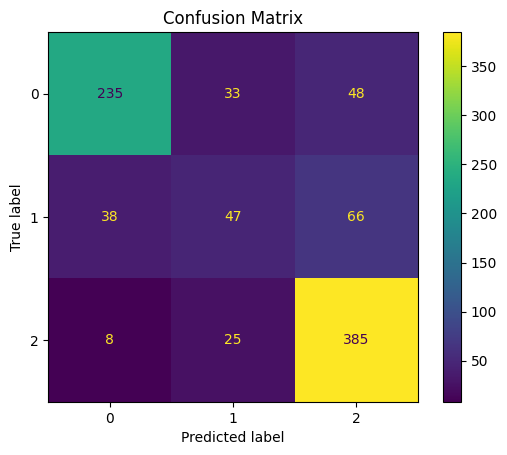

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()


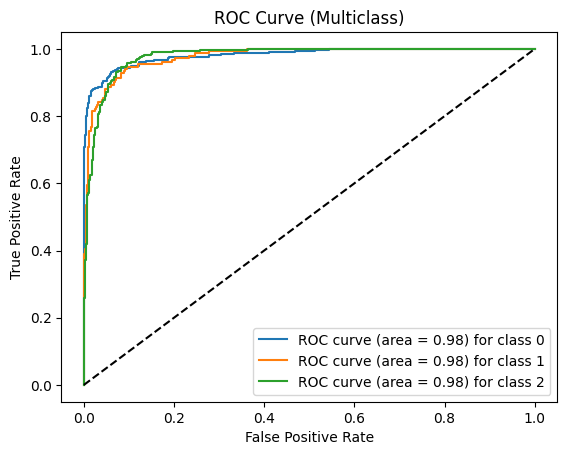

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
classifier = OneVsRestClassifier(model)

y_score = classifier.fit(X_test, y_test).predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc="lower right")
plt.show()

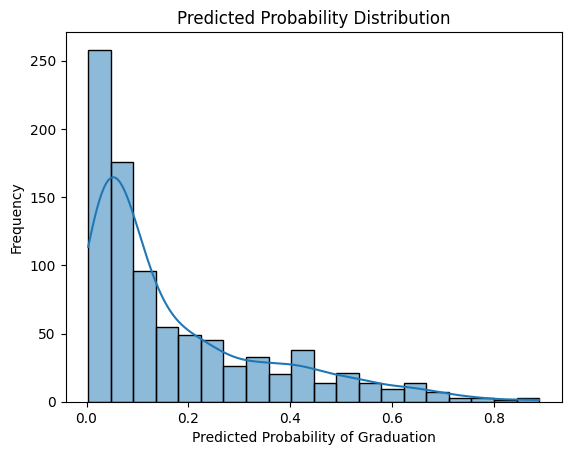

In [ ]:
import seaborn as sns

y_probs = model.predict_proba(X_test)[:, 1]
sns.histplot(y_probs, bins=20, kde=True)
plt.title('Predicted Probability Distribution')
plt.xlabel('Predicted Probability of Graduation')
plt.ylabel('Frequency')
plt.show()
